In [4]:
# read excel file by method read_excel
df= pd.read_excel(r"D:\The University\Level 2\tranning\sprints\4\0\Online Retail.xlsx")
#show frist 5 row in data
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


 - run code with excel is heavy on computer then change to csv file

In [5]:
# save data by extention csv
df.to_csv('Online Retail.csv',index=False)

## 1- Data cleaning

In [2]:
import pandas as pd # read csv file , visualization data
import numpy as np # linear algebra methodes
from matplotlib import pyplot as plt # draw plot
from sklearn.preprocessing import StandardScaler # scaling data by stander scaler
from sklearn.cluster import KMeans # create model KMeans
from sklearn.cluster import AgglomerativeClustering  # create model Hierarchical
import scipy.cluster.hierarchy as shc # functions from shc

In [3]:
# read excel file by method read_excel
data =pd.read_csv(r"D:\The University\Level 2\tranning\sprints\4\0\Online Retail.csv")
#show  data
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


##### the data contain : one col int (Quantity), one col datetime (InvoiceDate),   2 col float (UnitPrice,CustomerID), remaining columns object and found missing data in col (CustomerID , Description)


In [5]:
# to show all missing val
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

then found missing data in CustomerID ,Description

In [6]:
data.duplicated().sum()

5268

found duplicated data (duplicated in row)

## solve problem
-1- handel missing data by remove missing

-2- remove duplicated data

In [7]:
# to remove missing data in all col
data.dropna(axis=0 ,inplace= True)

In [8]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

the data is clean 

-solve problem 1-

In [9]:
# delet duplicated
data.drop_duplicates(inplace= True)

In [10]:
data.duplicated().sum()

0

data with no duplicated 

-solve problem 2-

then go to second problem (outliers in data) 

In [11]:
# copy data to be refrance data
df = data.copy()
# display data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [12]:
# describe data by function describe
df.describe().style.background_gradient(cmap = 'coolwarm')

,Quantity,UnitPrice,CustomerID
count,401604.000000,401604.000000,401604.000000
mean,12.183273,3.474064,15281.160818
std,250.283037,69.764035,1714.006089
min,-80995.000000,0.000000,12346.000000
25%,2.000000,1.250000,13939.000000
50%,5.000000,1.950000,15145.000000
75%,12.000000,3.750000,16784.000000
max,80995.000000,38970.000000,18287.000000


- from this discribe unexpected from domain in col Quantity	, UnitPrice	 the min is negative number then delet the unexpected val

In [13]:
# create groupby to show min and max row in Quantity
df.groupby("Quantity").min()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country
Quantity,,,,,,,
-80995,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",2011-12-09 09:27:00,2.08,16446.0,United Kingdom
-74215,C541433,23166,MEDIUM CERAMIC TOP STORAGE JAR,2011-01-18 10:17:00,1.04,12346.0,United Kingdom
-9360,C536757,84347,ROTATING SILVER ANGELS T-LIGHT HLDR,2010-12-02 14:23:00,0.03,15838.0,United Kingdom
-3114,C550456,21108,FAIRY CAKE FLANNEL ASSORTED COLOUR,2011-04-18 13:08:00,2.10,15749.0,United Kingdom
-2000,C550456,21175,GIN + TONIC DIET METAL SIGN,2011-04-18 13:08:00,1.85,15749.0,United Kingdom
...,...,...,...,...,...,...,...
4300,554868,22197,SMALL POPCORN HOLDER,2011-05-27 10:52:00,0.72,13135.0,United Kingdom
4800,573008,84077,WORLD WAR 2 GLIDERS ASSTD DESIGNS,2011-10-27 12:26:00,0.21,12901.0,United Kingdom
12540,578841,84826,ASSTD DESIGN 3D PAPER STICKERS,2011-11-25 15:57:00,0.00,13256.0,United Kingdom


In [14]:
# create groupby to show min and max row in UnitPrice
df.groupby("UnitPrice").max()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
UnitPrice,,,,,,,
0.000,578841,PADS,SET OF 9 BLACK SKULL BALLOONS,12540,2011-11-25 15:57:00,18059.0,United Kingdom
0.001,568375,PADS,PADS TO MATCH ALL CUSHIONS,1,2011-09-26 17:01:00,16198.0,United Kingdom
0.010,C545478,D,Discount,-720,2011-03-03 11:08:00,16422.0,United Kingdom
0.030,C567903,M,ROTATING SILVER ANGELS T-LIGHT HLDR,-120,2011-09-22 16:29:00,16422.0,United Kingdom
0.040,580619,16045,POPART WOODEN PENCILS ASST,900,2011-12-05 12:08:00,18033.0,United Kingdom
...,...,...,...,...,...,...,...
4161.060,C573079,M,Manual,1,2011-10-27 14:20:00,12536.0,France
4287.630,C560372,M,Manual,-1,2011-07-18 12:26:00,17448.0,United Kingdom
6930.000,C551699,M,Manual,-1,2011-05-03 14:12:00,16029.0,United Kingdom


- from groupby found row with negative value in col UnitPrice , Quantity
- remove unexpected value from data
- unexpected value in col Quantity less than zero and the outliers more than 12539
- unexpected value in col UnitPrice less than zero and the outliers more than 4288

In [15]:
# the value less than zero remove frome data
df = df[df.Quantity >0]

In [16]:
# the value less than one remove frome data
df = df[df.Quantity <12539]

In [17]:
# the value less than one remove frome data
df = df[df.UnitPrice >.9999]

In [18]:
# the value less than one remove frome data
df = df[df.UnitPrice <4288]

In [19]:
#show min and max after apply pervious method
df.groupby("Quantity").min()

,InvoiceNo,StockCode,Description,InvoiceDate,UnitPrice,CustomerID,Country
Quantity,,,,,,,
1,536381,10135,4 PURPLE FLOCK DINNER CANDLES,2010-12-01 09:41:00,1.00,12348.0,Australia
2,536365,10135,4 PURPLE FLOCK DINNER CANDLES,2010-12-01 08:26:00,1.00,12347.0,Australia
3,536367,10135,4 PURPLE FLOCK DINNER CANDLES,2010-12-01 08:34:00,1.00,12347.0,Australia
4,536367,10135,4 PURPLE FLOCK DINNER CANDLES,2010-12-01 08:34:00,1.00,12347.0,Australia
5,536381,10135,DOLLY GIRL BEAKER,2010-12-01 09:41:00,1.00,12352.0,Australia
...,...,...,...,...,...,...,...
2040,579498,23084,RABBIT NIGHT LIGHT,2011-11-29 15:52:00,1.79,12798.0,Japan
2100,574294,21915,RED HARMONICA IN BOX,2011-11-03 15:47:00,1.06,16333.0,United Kingdom
2400,573003,23084,RABBIT NIGHT LIGHT,2011-10-27 12:11:00,2.08,14646.0,Netherlands


In [20]:
#show min and max after apply pervious method
df.groupby("UnitPrice").max()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,CustomerID,Country
UnitPrice,,,,,,,
1.00,581434,POST,VANILLA SCENT CANDLE JEWELLED BOX,392,2011-12-08 16:10:00,17800.0,United Kingdom
1.01,580178,22686,FRENCH BLUE METAL DOOR SIGN No,96,2011-12-02 11:53:00,16013.0,United Kingdom
1.02,561672,21891,TRADITIONAL WOODEN SKIPPING ROPE,576,2011-07-28 17:18:00,12830.0,United Kingdom
1.04,581571,84970L,ZINC HEART FLOWER T-LIGHT HOLDER,400,2011-12-09 12:00:00,18242.0,United Kingdom
1.05,581175,90108,TOAST ITS - I LOVE YOU,192,2011-12-07 15:16:00,17827.0,United Kingdom
...,...,...,...,...,...,...,...
2382.92,548813,M,Manual,1,2011-04-04 13:03:00,12744.0,Singapore
2500.00,562946,M,Manual,1,2011-08-11 09:38:00,15581.0,United Kingdom
3155.95,569382,M,Manual,1,2011-10-03 16:44:00,15502.0,United Kingdom


In [21]:
# describe data by function describe
df.describe().style.background_gradient(cmap = 'coolwarm')

,Quantity,UnitPrice,CustomerID
count,301019.000000,301019.000000,301019.000000
mean,9.844814,3.867924,15290.655218
std,31.995887,20.560905,1711.922271
min,1.000000,1.000000,12347.000000
25%,2.000000,1.650000,13969.000000
50%,4.000000,2.460000,15150.000000
75%,10.000000,4.250000,16794.000000
max,3114.000000,4161.060000,18287.000000


- No outliers but found big difference (min , max)
- to solve this apply scaling on data

In [22]:
# select col Quantity 
data_q = df[["Quantity"]]
scaler = StandardScaler()
# make scaler on col Quantity
df[["Quantity"]] = scaler.fit_transform(data_q)

In [23]:
# select col UnitPrice 
data_p = df[["UnitPrice"]]
scaler = StandardScaler()
# make scaler on col UnitPrice
df[["UnitPrice"]] = scaler.fit_transform(data_p)

In [122]:
# select col Quantity 
data_m = df[["month"]]
scaler = StandardScaler()
# make scaler on col Quantity
df[["month"]] = scaler.fit_transform(data_m)

In [123]:
# select col Quantity 
data_pr = df[["total_price"]]
scaler = StandardScaler()
#make scaler on col Quantity
df[["total_price"]] = scaler.fit_transform(data_pr)

In [124]:
# select col Quantity 
data_c = df[["CustomerID"]]
scaler = StandardScaler()
# make scaler on col Quantity
df[["CustomerID"]] = scaler.fit_transform(data_c)

In [125]:
# select col Quantity 
data_y = df[["year"]]
scaler = StandardScaler()
# make scaler on col Quantity
df[["year"]] = scaler.fit_transform(data_y)

In [126]:
# describe data by function describe
df.describe().style.background_gradient(cmap = 'coolwarm')

,Quantity,UnitPrice,CustomerID,year,month,total_price
count,301019.000000,301019.000000,301019.000000,301019.000000,301019.000000,301019.000000
mean,0.000000,-0.000000,-0.000000,-0.000000,-0.000000,-0.000000
std,1.000002,1.000002,1.000002,1.000002,1.000002,1.000002
min,-0.276436,-0.139485,-1.719506,-3.669958,-1.909937,-182.398557
25%,-0.245182,-0.107871,-0.772031,0.272483,-0.747047,0.017124
50%,-0.182674,-0.068476,-0.082162,0.272483,0.125121,0.062147
75%,0.004850,0.018583,0.878163,0.272483,0.997288,0.106172
max,97.017480,202.189491,1.750284,0.272483,1.288011,160.752643


In [129]:
# select col Quantity 
data_m = df[["month"]]
scaler = StandardScaler()
# make scaler on col Quantity
df[["month"]] = scaler.fit_transform(data_m)

In [130]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.120166,2010-12-01 08:26:00,-0.064099,1.495015,United Kingdom,2010,1.288011,0.089000
1,536365,71053,WHITE METAL LANTERN,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,1.288011,0.072974
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.057658,2010-12-01 08:26:00,-0.054371,1.495015,United Kingdom,2010,1.288011,0.074089
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,1.288011,0.072974
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,1.288011,0.072974
...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,1.288011,0.055674
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,-0.120166,2011-12-09 12:50:00,-0.085985,-1.524987,France,2011,1.288011,0.097586
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,1.288011,0.055674
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,1.288011,0.055674


- No found outliers and big difference after apply scaling

## visualization

In [24]:
# show all element in col Country
df["Country"].value_counts()  

United Kingdom          267487
Germany                   6909
France                    6323
EIRE                      5645
Spain                     1979
Netherlands               1723
Belgium                   1536
Switzerland               1403
Portugal                  1123
Australia                  944
Norway                     836
Italy                      646
Channel Islands            617
Cyprus                     524
Finland                    508
Austria                    314
Denmark                    289
Sweden                     289
Poland                     275
Japan                      220
Unspecified                188
Israel                     174
Singapore                  167
Iceland                    139
USA                        131
Greece                     122
Malta                      102
Canada                     101
RSA                         54
European Community          52
United Arab Emirates        51
Lebanon                     43
Lithuani

- big country United Kingdom  and less Saudi Arabia 

In [25]:
# replace all element into 
df.replace("Israel", "Palestine",inplace = True)

In [26]:
# show all element in col Country
df["Country"].value_counts() 

United Kingdom          267487
Germany                   6909
France                    6323
EIRE                      5645
Spain                     1979
Netherlands               1723
Belgium                   1536
Switzerland               1403
Portugal                  1123
Australia                  944
Norway                     836
Italy                      646
Channel Islands            617
Cyprus                     524
Finland                    508
Austria                    314
Denmark                    289
Sweden                     289
Poland                     275
Japan                      220
Unspecified                188
Palestine                  174
Singapore                  167
Iceland                    139
USA                        131
Greece                     122
Malta                      102
Canada                     101
RSA                         54
European Community          52
United Arab Emirates        51
Lebanon                     43
Lithuani

### to create model selete new col 

In [140]:
# create col year and month from col InvoiceDate
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
df['year'] = df['InvoiceDate'].dt.year
df['month'] = df['InvoiceDate'].dt.month
# show data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.120166,2010-12-01 08:26:00,-0.064099,1.495015,United Kingdom,2010,12,0.089000
1,536365,71053,WHITE METAL LANTERN,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,12,0.072974
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.057658,2010-12-01 08:26:00,-0.054371,1.495015,United Kingdom,2010,12,0.074089
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,12,0.072974
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,12,0.072974
...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,12,0.055674
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,-0.120166,2011-12-09 12:50:00,-0.085985,-1.524987,France,2011,12,0.097586
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,12,0.055674
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,12,0.055674


In [112]:
# create col total_price from prodact cols (UnitPrice,Quantity)
df["total_price"] = df["UnitPrice"] * df["Quantity"]
# show data
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,year,month,total_price
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.120166,2010-12-01 08:26:00,-0.064099,1.495015,United Kingdom,2010,12,0.007702
1,536365,71053,WHITE METAL LANTERN,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,12,0.002793
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.057658,2010-12-01 08:26:00,-0.054371,1.495015,United Kingdom,2010,12,0.003135
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,12,0.002793
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.120166,2010-12-01 08:26:00,-0.023244,1.495015,United Kingdom,2010,12,0.002793
...,...,...,...,...,...,...,...,...,...,...,...
541903,581587,23256,CHILDRENS CUTLERY SPACEBOY,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,12,-0.002506
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,-0.120166,2011-12-09 12:50:00,-0.085985,-1.524987,France,2011,12,0.010332
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,12,-0.002506
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,-0.182674,2011-12-09 12:50:00,0.013719,-1.524987,France,2011,12,-0.002506


# Model

## 1- K-means

In [141]:
# select index 3,9 (Quantity, month)
X_1 = df.iloc[:, [3,9]].values

- i think col Quantity, month is useful for model and total price and moth there are effict on data

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

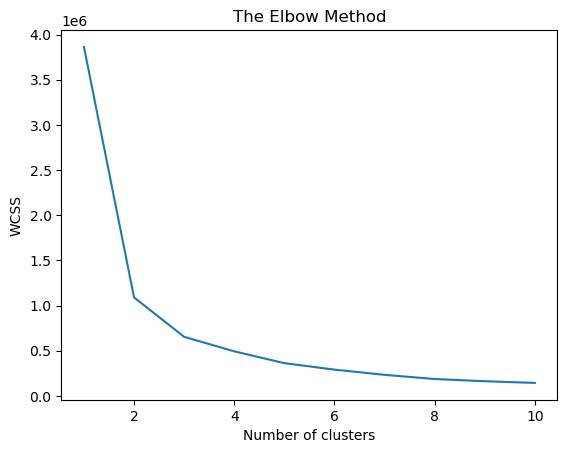

In [142]:
# Draw the elpow graph
# create for loop to show what select no. culster
wcss = []
for i in range(1, 11):
    #build model k-mean 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # fit model on feuter x-1
    kmeans.fit(X_1)
    wcss.append(kmeans.inertia_)
    # draw graph on plot on range (1 ,11) 
plt.plot(range(1, 11), wcss)
# create title on graph
plt.title('The Elbow Method')
# create name of x-axis 
plt.xlabel('Number of clusters')
# create name of y-axis
plt.ylabel('WCSS')
# show plot
plt.show()

- select 3 cluster from graph

In [143]:
# bulid model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X_1)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


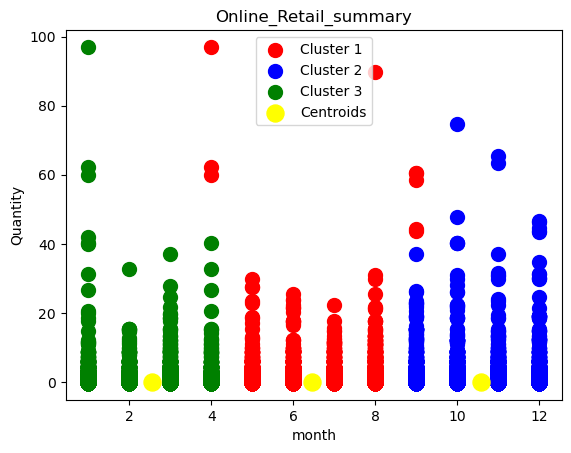

In [144]:
# Visualising the clusters
# show clusters
plt.scatter(X_1[y_kmeans == 0, 1], X_1[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_kmeans == 1, 1], X_1[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_kmeans == 2, 1], X_1[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
# show Centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 150, c = 'yellow'
            , label = 'Centroiqds')
plt.title('Online_Retail_summary')
plt.xlabel("month")
plt.ylabel('Quantity')
plt.legend()
plt.show()

- from this graph data sorted into 3 cluter and the Centroids is midel cluster
- hint : the month not scaling but Quantity is scaling
- scale moth and all col from pevours  

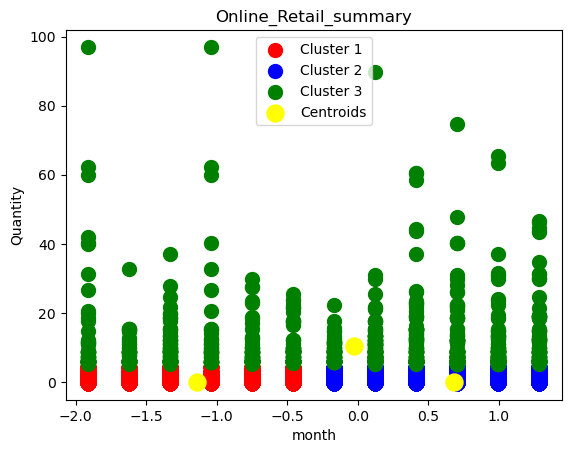

In [139]:
# Visualising the clusters
# show clusters
plt.scatter(X_1[y_kmeans == 0, 1], X_1[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X_1[y_kmeans == 1, 1], X_1[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X_1[y_kmeans == 2, 1], X_1[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
# show Centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 150, c = 'yellow'
            , label = 'Centroids')
plt.title('Online_Retail_summary')
plt.xlabel("month")
plt.ylabel('Quantity')
plt.legend()
plt.show()

- from this graph data sorted into 3 cluter and the Centroids is midel cluster
- but the green cluster gain all element (this problem)
- what should i do in this problem

## other model
create model with two feuter (total price , month)

In [149]:
# select index 10,9 (month , total price)
x_2 = df.iloc[:, [10,9]].values

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_k

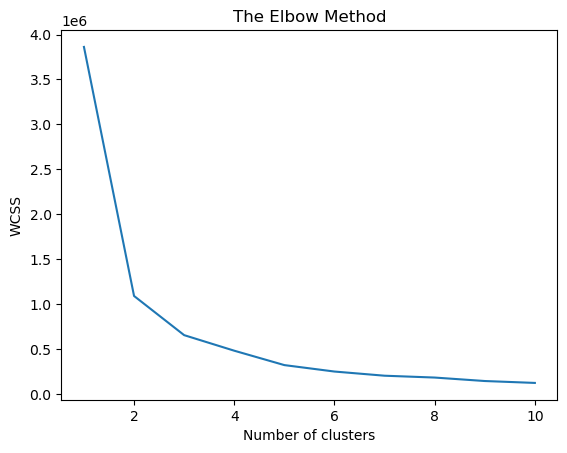

In [150]:
# Draw the elpow graph
# create for loop to show what select no. culster
wcss = []
for i in range(1, 11):
    #build model k-mean 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    # fit model on feuter x-1
    kmeans.fit(x_2)
    wcss.append(kmeans.inertia_)
    # draw graph on plot on range (1 ,11) 
plt.plot(range(1, 11), wcss)
# create title on graph
plt.title('The Elbow Method')
# create name of x-axis 
plt.xlabel('Number of clusters')
# create name of y-axis
plt.ylabel('WCSS')
# show plot
plt.show()

- select 3 cluster from graph

In [151]:
# bulid model with 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(x_2)

C:\Users\DELL\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


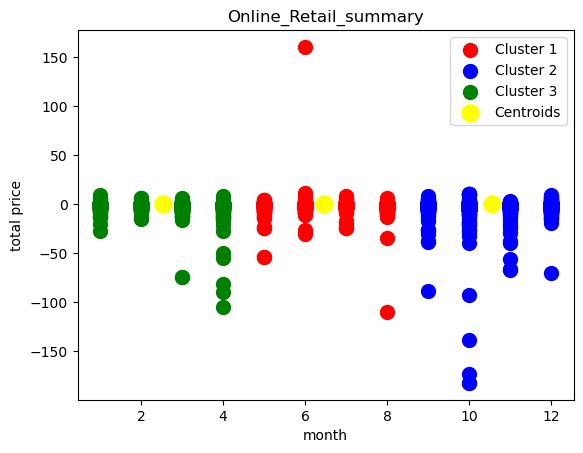

In [148]:
# Visualising the clusters
# show clusters
plt.scatter(x_2[y_kmeans == 0, 1], x_2[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_2[y_kmeans == 1, 1], x_2[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_2[y_kmeans == 2, 1], x_2[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
# show Centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 150, c = 'yellow'
            , label = 'Centroids')
plt.title('Online_Retail_summary')
plt.xlabel("month")
plt.ylabel('total price')
plt.legend()
plt.show()

- this graph same graph 1 (quntatiy and month)
- hadel scaler month

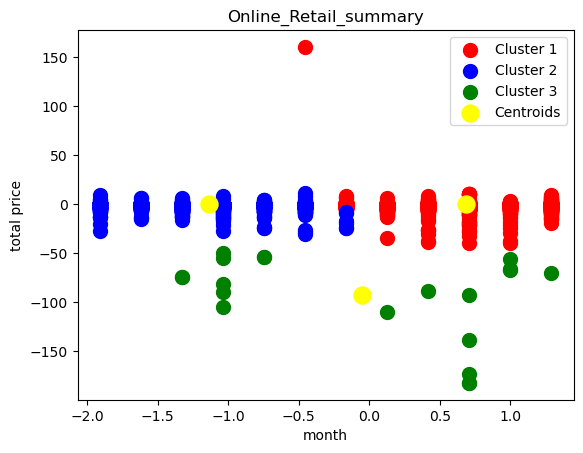

In [134]:
# Visualising the clusters
# show clusters
plt.scatter(x_2[y_kmeans == 0, 1], x_2[y_kmeans == 0, 0], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x_2[y_kmeans == 1, 1], x_2[y_kmeans == 1, 0], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(x_2[y_kmeans == 2, 1], x_2[y_kmeans == 2, 0], s = 100, c = 'green', label = 'Cluster 3')
# show Centroids
plt.scatter(kmeans.cluster_centers_[:, 1], kmeans.cluster_centers_[:, 0], s = 150, c = 'yellow'
            , label = 'Centroids')
plt.title('Online_Retail_summary')
plt.xlabel("month")
plt.ylabel('total price')
plt.legend()
plt.show()

- from this graph data sorted into 3 cluter and the Centroids is midel cluster
- but the green cluster is not handel (problem)
- what should i do in this problem

## 2- hierarichal

In [161]:
# slect feuter
X = df.iloc[:, [3,9]].values

MemoryError: Unable to allocate 338. GiB for an array with shape (45306068671,) and data type float64

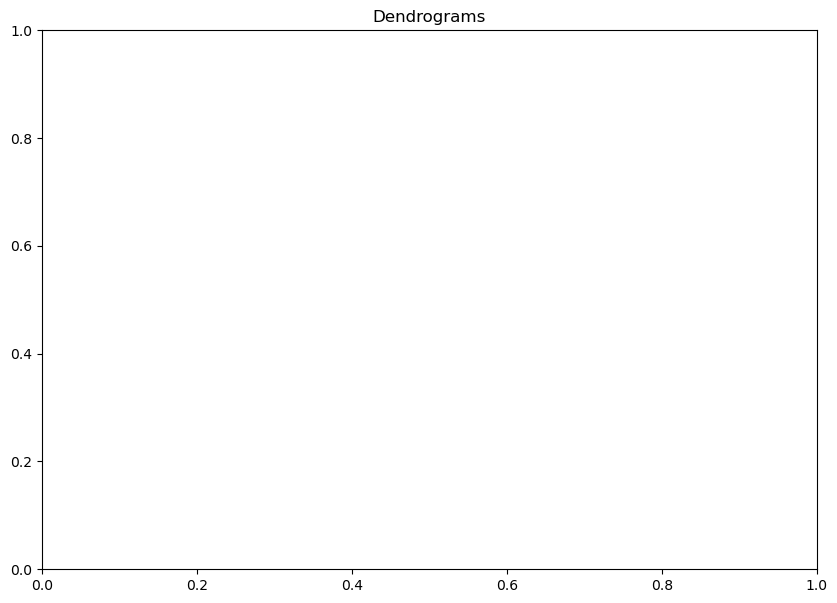

In [162]:
# create Dendrograms
plt.figure(figsize=(10, 7))
plt.title("Dendrograms")
dend = shc.dendrogram(shc.linkage(X, method='ward'))
plt.axhline(y=6, color='r', linestyle='--')

#### my menory is not enough to run code hierarichal